# Salary Prediction for Position Level using Polynomial Regression

## Table of Contents

- [Data Preprocessing](#Data-Preprocessing)
  - Importing the libraries
  - Importing the dataset
- [Linear Regression on the whole dataset](#Linear-Regression-on-the-whole-dataset)
  - Training the Linear Regression model
  - Visualizing the Linear Regression results
  - Predicting a new result with Linear Regression
- [Polynomial Regression on the whole dataset](#Polynomial-Regression-on-the-whole-dataset)
  - Importing polynomial preprocessing features
  - Training the Polynomial Regression model
  - Visualizing the Polynomial Regression results
  - Visualizing the Polynomial Regression results (for higher resolution and smoother curve)
  - Predicting a new result with Polynomial Regression

## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

The dataset's first two columns `Position` and `Level` represent the same data. Since `Level` is a numerical representation of the categorical data under `Position`, the `Position` data is excluded.

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values # Position index is excluded
y = dataset.iloc[:, -1].values

In [3]:
print(X[:5])

[[1]
 [2]
 [3]
 [4]
 [5]]


In [4]:
print(y[:5])

[ 45000  50000  60000  80000 110000]


## Linear Regression on the whole dataset

### Training the Linear Regression model

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # using the whole dataset (no training and test datasets)

LinearRegression()

### Visualizing the Linear Regression results

In [6]:
y_pred = lin_reg.predict(X)

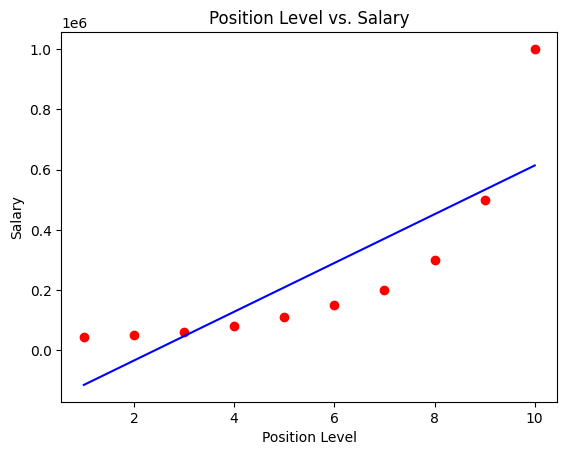

In [7]:
plt.scatter(X, y, c = "red")
plt.plot(X, lin_reg.predict(X), c = "blue")
plt.title("Position Level vs. Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Predicting a new result with Linear Regression

In [8]:
X_new = 7 # arbitrarily choosing position level 7 to predict their salary)
y_new = lin_reg.predict([[X_new]])
print(f"The predicted salary for level {X_new} using Linear Regression is ${int(y_new):,}")

The predicted salary for level 7 using Linear Regression is $370,818


In [9]:
level = dataset.loc[dataset["Level"] == X_new, :]
print(f"The data row for Level {X_new}: \n{level}")

The data row for Level 7: 
  Position  Level  Salary
6  Partner      7  200000


In [10]:
print(f"Predicted salary / Actual salary using Linear Regression = {round(370818/200000,2)}")

Predicted salary / Actual salary using Linear Regression = 1.85


From the visualization, the predicted salaries in blue provided by the linear regression model is not optimal for this dataset as the actual salaries follow a polynomial trend. Thus, linear regression underfits the data. 

For a position level of 7, the predicted salary is \\$370,818 which overstates the actual salary of \\$200,000 by 185%.

## Polynomial Regression on the whole dataset

### Importing polynomial preprocessing features

In [11]:
from sklearn.preprocessing import PolynomialFeatures

### Training the Polynomial Regression model 

Degrees of freedom variable `nth_degree` is arbitrarily picked and incrementally increased to best fit the regression curve in the visualization

In [12]:
nth_degree = 4 # arbitrary maximum coefficient power -> y = b0 + b1x1 + b2x1^2 + ...
poly_reg = PolynomialFeatures(degree = nth_degree) 
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

### Visualizing the Polynomial Regression results

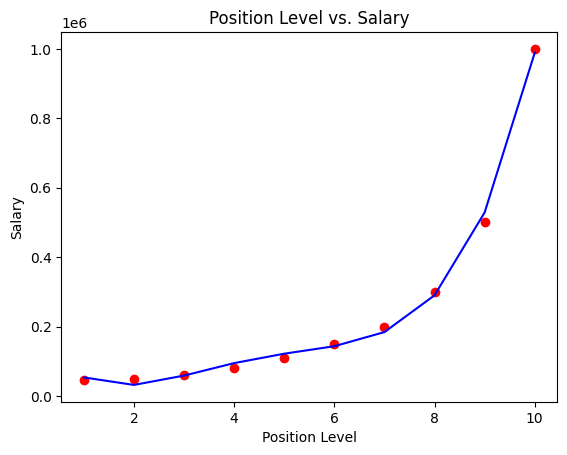

In [13]:
plt.scatter(X, y, c = "red")
plt.plot(X, lin_reg_2.predict(X_poly), c = "blue")
plt.title("Position Level vs. Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Visualizing the Polynomial Regression results (for higher resolution and smoother curve)

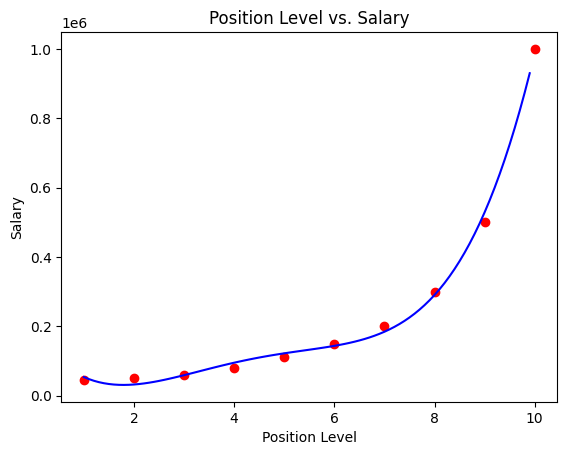

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Position Level vs. Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Predicting a new result with Polynomial Regression

In [15]:
X_new = 7 # arbitrarily choosing position level 7 to predict their salary)
y_new = lin_reg_2.predict(poly_reg.fit_transform([[X_new]]))
print(f"The predicted salary for level {X_new} using Polynomial Regression is ${int(y_new):,}")

The predicted salary for level 7 using Polynomial Regression is $184,003


In [16]:
level = dataset.loc[dataset["Level"] == X_new, :]
print(f"The data row for Level {X_new}: \n{level}")

The data row for Level 7: 
  Position  Level  Salary
6  Partner      7  200000


In [17]:
print(f"Predicted salary / Actual salary = {round(184003/200000,2)}")

Predicted salary / Actual salary = 0.92


Compared to the linear regression model, the polynomial regression better predicts the salaries for employees of a given position level. 

For a position level of 7, the polynomial regression model predicts the salary to be \\$184,003, which matches the actual salary of \\$200,000 within a 10% error (1- 0.92 = 8%).